In [296]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Dense, Input, BatchNormalization
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [297]:
data = pd.read_csv('data.csv')
y = data['child_mort']
X = data.drop(['child_mort', 'country'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train_reshaped = np.expand_dims(x_train.values, axis=1)  # shape: (samples, 1, features)

In [ ]:

# Reshape x_train for Conv1D: (samples, steps, features)

model = Sequential([
    Input(shape=(1, x_train.shape[1])),  # Forma: (1, n_features)
    
    # Capa Conv1D para extraer patrones locales (kernel_size=3 para grupos de 3 features)
    Conv1D(filters=128, kernel_size=1, activation='linear'),  # Capa convolucional con padding para mantener dimensiones
    
    BatchNormalization(),
    
    # # Capas densas para interpretar features
    Dense(1, activation='linear')  # Salida lineal (regresión)
])

from tensorflow import keras

adam = keras.optimizers.Adam(learning_rate=0.1)


# Compilación
model.compile(
    optimizer=adam,
    # loss=non_negative_mse,  # Error cuadrático medio para regresión
    loss='mse',  # Error cuadrático medio para regresión
    metrics=['mae']  # Error absoluto medio
)

# Entrenamiento
history = model.fit(
    x_train_reshaped, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=4,
    # verbose=1
)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2007.4496 - mae: 35.4724 - val_loss: 2644.0491 - val_mae: 39.5780
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1142.0779 - mae: 25.4002 - val_loss: 951.1616 - val_mae: 27.3358
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1181.5951 - mae: 26.4200 - val_loss: 1014.1462 - val_mae: 28.5412
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1870.1475 - mae: 31.3184 - val_loss: 992.9531 - val_mae: 28.2433
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1710.4873 - mae: 33.1691 - val_loss: 1055.6853 - val_mae: 28.0642
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1035.1967 - mae: 22.0446 - val_loss: 1026.9386 - val_mae: 27.1200
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1298.0508 - mae: 26.6298 - val_loss: 1202.0421 - val_mae: 27.1520
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1702.3088 - mae: 30.5013 - val_loss: 1099.2186 - val_mae: 26.9897
E

In [299]:
model.summary()


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_60 (Conv1D)              │ (None, 1, 128)         │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,869 (19.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 3,076 (12.02 KB)

In [300]:
# model.evaluate(np.expand_dims(x_test.values, axis=1), y_test)
model.predict(np.expand_dims(x_test.values, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[ 52.24302 ],
       [ 46.18547 ],
       [ 43.990192],
       [ 54.774834],
       [ 19.709255],
       [  7.691313],
       [ 48.202515],
       [-39.42035 ],
       [ 38.179096],
       [ 54.318203],
       [ 49.74698 ],
       [ 14.501547],
       [  6.348093],
       [ 27.76956 ],
       [ 36.64528 ],
       [ 56.576916],
       [ 55.858807],
       [ 27.47967 ],
       [ 35.132217],
       [ 46.38141 ],
       [ 46.327522],
       [ 47.957817],
       [ 53.720356],
       [ 36.249966],
       [-36.121662],
       [ 12.258572],
       [ 54.374622],
       [ 21.19486 ],
       [ 37.804615],
       [ 54.621223],
       [ 48.934322],
       [ 43.92142 ],
       [ 49.543137],
       [ 38.714256]], dtype=float32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


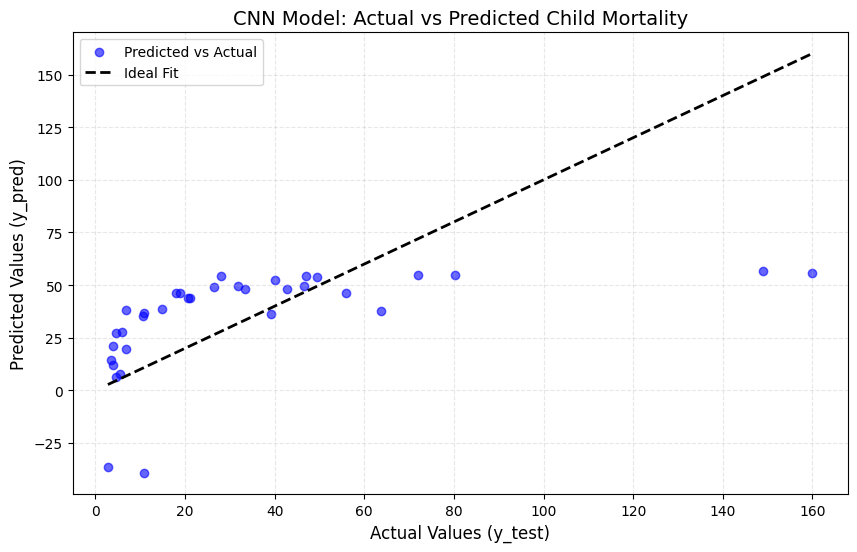

In [301]:
import matplotlib.pyplot as plt

# Generate predictions
x_test_reshaped = np.expand_dims(x_test.values, axis=1)  # Reshape test data
y_pred = model.predict(x_test_reshaped).flatten()  # Flatten predictions

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Add ideal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'k--', lw=2, label='Ideal Fit')

# Labels and title
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)
plt.title('CNN Model: Actual vs Predicted Child Mortality', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate metrics (MAE and R²)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR²: {r2:.2f}', 
#          transform=plt.gca().transAxes,
#          verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

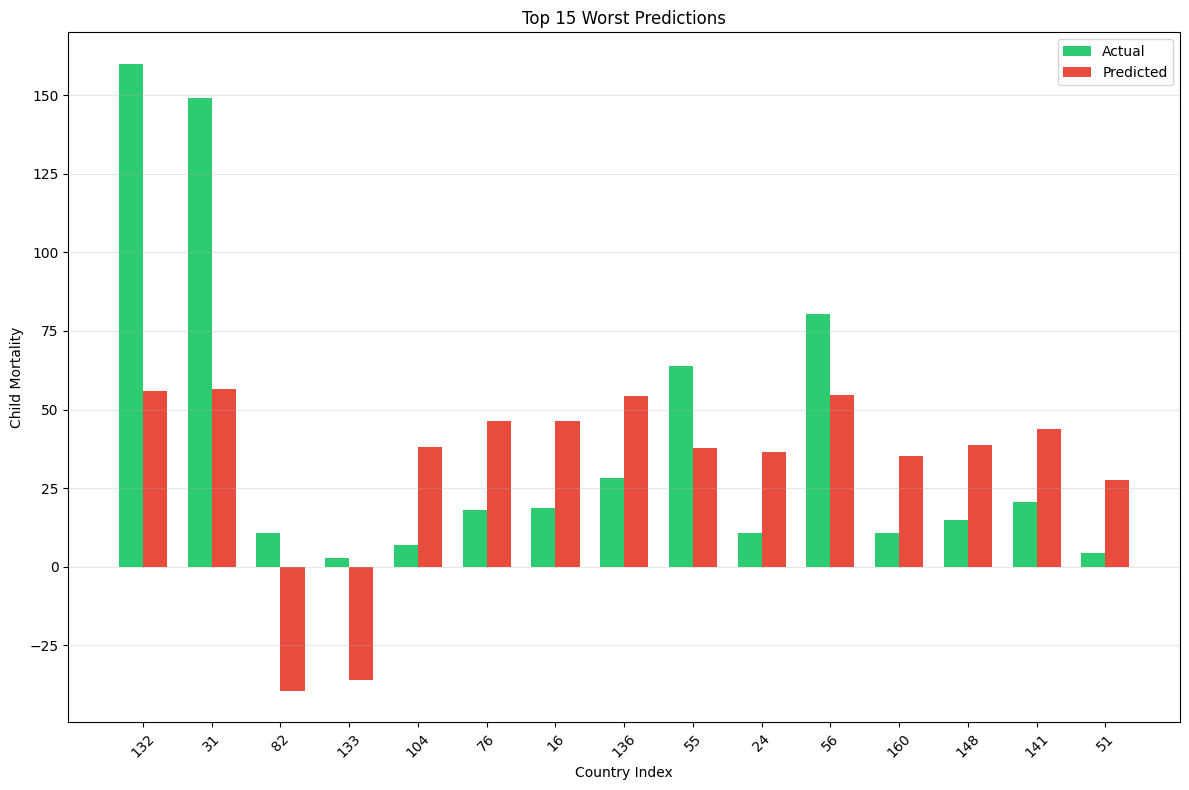

In [302]:
# Get top N worst predictions for analysis
N = 15
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_df['Abs_Error'] = np.abs(test_df['Actual'] - test_df['Predicted'])
worst_predictions = test_df.sort_values('Abs_Error', ascending=False).head(N)

# Plot
plt.figure(figsize=(12, 8))
x_axis = np.arange(len(worst_predictions))
width = 0.35

plt.bar(x_axis - width/2, worst_predictions['Actual'], width, label='Actual', color='#2ecc71')
plt.bar(x_axis + width/2, worst_predictions['Predicted'], width, label='Predicted', color='#e74c3c')

plt.xticks(x_axis, worst_predictions.index, rotation=45)
plt.xlabel('Country Index')
plt.ylabel('Child Mortality')
plt.title(f'Top {N} Worst Predictions')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

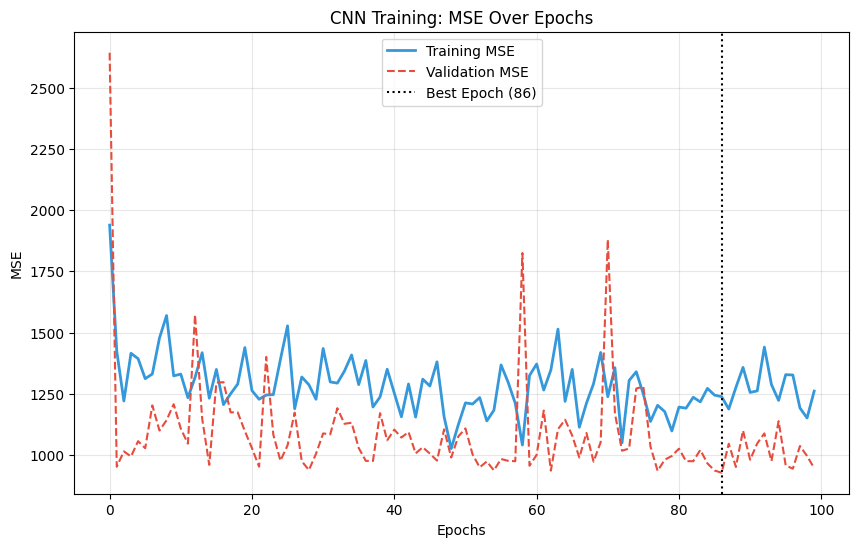

In [303]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training MSE', color='#3498db', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation MSE', color='#e74c3c', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('CNN Training: MSE Over Epochs')
plt.legend()
plt.grid(alpha=0.3)

# Highlight best epoch
best_epoch = np.argmin(history.history['val_loss'])
plt.axvline(best_epoch, color='k', linestyle=':', label=f'Best Epoch ({best_epoch})')
plt.legend()
plt.show()